
==== Model Comparison ====
+---------------+----------+--------------+-------+
|               |   MAE    |     MSE      |  R^2  |
+---------------+----------+--------------+-------+
| random_forest | 4166.032 | 36732604.487 | 0.811 |
|   lightgbm    | 4245.032 | 34357003.507 | 0.823 |
|    xgboost    | 5780.205 | 53760713.922 | 0.718 |
+---------------+----------+--------------+-------+


<Figure size 1000x600 with 0 Axes>

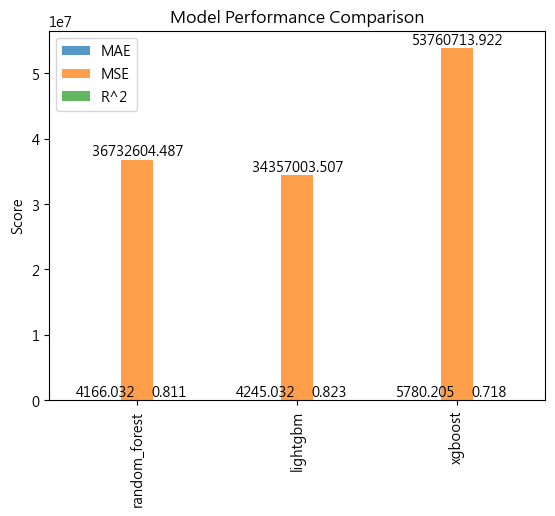

<Figure size 1200x800 with 0 Axes>

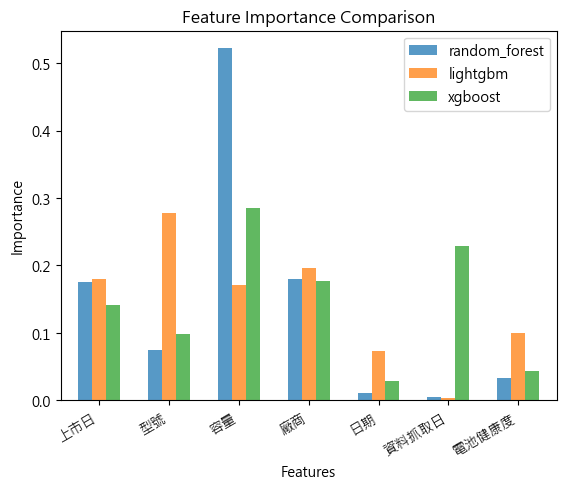

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import font_manager
from tabulate import tabulate


# 設置 Matplotlib 內建的支持繁體字的字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用 Microsoft JhengHei
plt.rcParams['axes.unicode_minus'] = False  # 防止顯示負號時出現錯誤

# 讀取模型結果
models = ['random_forest', 'lightgbm', 'xgboost']
results = {}
feature_importances = {}

for model_name in models:
    with open(f'{model_name}_results.json', 'r', encoding='utf-8') as f:
        data = json.load(f)
        results[model_name] = {
            'MAE': data['MAE'],
            'MSE': data['MSE'],
            'R^2': data['R^2']
        }
        feature_importances[model_name] = data['Feature Importance']

# 整合特徵名稱
all_features = set()
for fi in feature_importances.values():
    all_features.update(fi.keys())
all_features = sorted(all_features)

# 整合特徵重要性
importance_df = pd.DataFrame(index=all_features)
for model_name in models:
    importance = feature_importances.get(model_name, {})
    importance = {k: importance.get(k, 0) for k in all_features}  # 填補缺失特徵
    importance_df[model_name] = pd.Series(importance)

# 模型評估指標比較
results_df = pd.DataFrame(results).T
results_df = results_df.round(3)
print('\n==== Model Comparison ====')
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

# 評估指標條形圖
plt.figure(figsize=(10, 6))
ax1 = results_df.plot(kind='bar', alpha=0.75, width=0.6)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

# 特徵重要性條形圖
plt.figure(figsize=(12, 8))
ax2 = importance_df.plot(kind='bar', alpha=0.75, width=0.6)
plt.title('Feature Importance Comparison')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=30, ha='right')  # 調整特徵名稱旋轉角度及對齊方式
plt.show()


In [5]:
!pip install tabulate

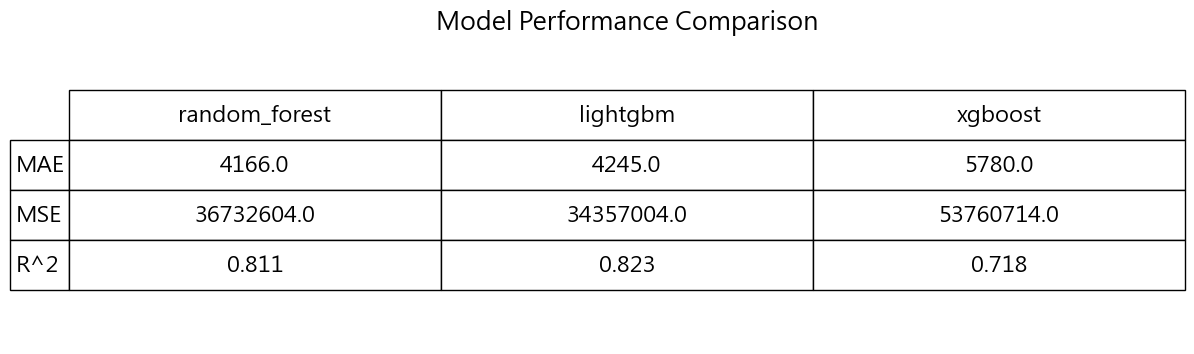

<Figure size 200x600 with 0 Axes>

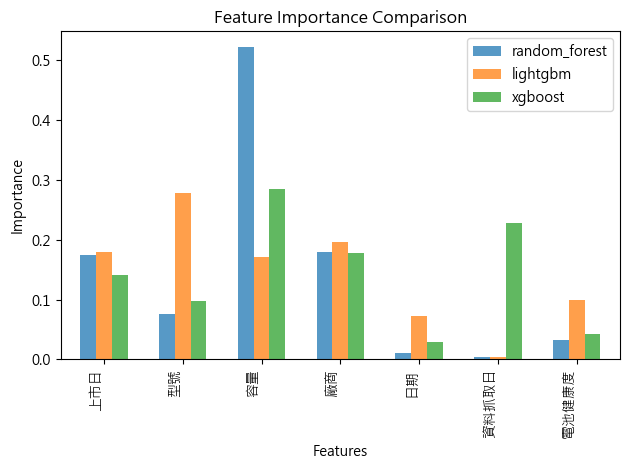

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# 設置 Matplotlib 內建的支持繁體字的字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用 Microsoft JhengHei
plt.rcParams['axes.unicode_minus'] = False  # 防止顯示負號時出現錯誤

# 讀取模型結果
models = ['random_forest', 'lightgbm', 'xgboost']
results = {}
feature_importances = {}

for model_name in models:
    with open(f'{model_name}_results.json', 'r', encoding='utf-8') as f:
        data = json.load(f)
        results[model_name] = {
            'MAE': data['MAE'],
            'MSE': data['MSE'],
            'R^2': data['R^2']
        }
        feature_importances[model_name] = data['Feature Importance']

# 整合特徵名稱
all_features = set()
for fi in feature_importances.values():
    all_features.update(fi.keys())
all_features = sorted(all_features)

# 整合特徵重要性
importance_df = pd.DataFrame(index=all_features)
for model_name in models:
    importance = feature_importances.get(model_name, {})
    importance = {k: importance.get(k, 0) for k in all_features}  # 填補缺失特徵
    importance_df[model_name] = pd.Series(importance)

# 模型評估指標比較，顛倒行列
results_df = pd.DataFrame(results).T
results_df = results_df.round({'MAE': 0, 'MSE': 0, 'R^2': 3})  # MAE 和 MSE 顯示整數，R^2 顯示到小數點後三位

# 顛倒行列，使模型成為表格的行
results_df = results_df.T

# 顯示為表格
fig, ax = plt.subplots(figsize=(12, 4))  # 減少表格周圍空白的大小，縮小高度
ax.axis('off')  # 不顯示坐標軸
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, rowLabels=results_df.index, cellLoc='center', loc='center')

# 設置表格樣式
table.auto_set_font_size(False)
table.set_fontsize(16)  # 增加字體大小
table.scale(1.2, 3.0)  # 減小表格的縮放，讓表格佔據更多空間

# 為數值設定顯示格式
for (i, j), cell in table.get_celld().items():
    if isinstance(cell, plt.Text):
        if j > 0:  # 排除列標題
            if results_df.columns[j] in ['MAE', 'MSE']:
                cell.set_text(f'{float(cell.get_text()):.0f}')  # MAE 和 MSE 顯示為整數
            else:
                cell.set_text(f'{float(cell.get_text()):.3f}')  # 其他顯示為三位小數

# 增加標題，並調整與表格之間的距離
plt.title('Model Performance Comparison', fontsize=18, pad=5)  # 調整標題字型和與表格的距離

plt.show()


# 特徵重要性條形圖

plt.figure(figsize=(2,6))
ax2 = importance_df.plot(kind='bar', alpha=0.75, width=0.6)
plt.title('Feature Importance Comparison')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90, ha='right')  # 調整特徵名稱旋轉角度及對齊方式
plt.tight_layout()  # 自動調整佈局，避免文字重疊
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.85)
plt.show()



<Figure size 20000x600 with 0 Axes>

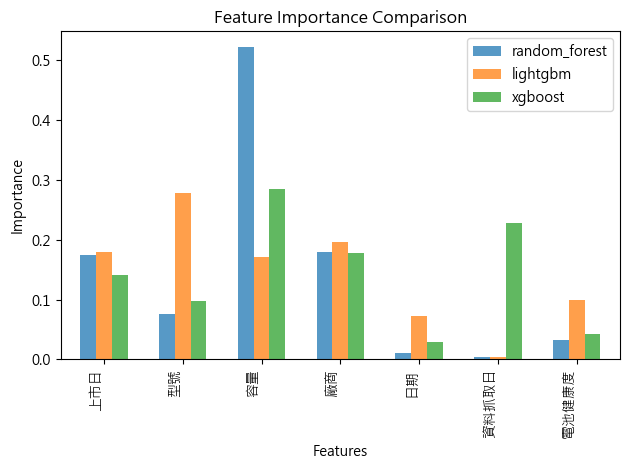

In [104]:
plt.figure(figsize=(200,6))
ax2 = importance_df.plot(kind='bar', alpha=0.75, width=0.6)
plt.title('Feature Importance Comparison')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90, ha='right')  # 調整特徵名稱旋轉角度及對齊方式
plt.tight_layout()  # 自動調整佈局，避免文字重疊
#plt.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.85)
plt.show()


In [50]:
import pandas as pd

# 讀取 JSON 檔案
with open('final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 將 JSON 轉換為 DataFrame
df = pd.DataFrame(data)


# 取得各個特徵的型別
data_types = df.dtypes.to_dict()

# 排除缺失值後，各特徵的類別數量
non_null_counts = df.nunique(dropna=True).to_dict()

# 顯示結果
print("各特徵的資料型別:")
for key, value in data_types.items():
    print(f"{key}: {value}")

print("\n排除缺失值後，各特徵的類別數量:")
for key, value in non_null_counts.items():
    print(f"{key}: {value}")

print(f"目前資料筆數：{len(data)}")

各特徵的資料型別:
廠商: object
型號: object
金額: int64
容量: float64
電池健康度: float64
顏色: object
日期: object
地區: object
福利品: object
配件: object
全新: object
保固時長: float64
記憶體: float64
上市日: object
資料抓取日: object
抓取日建議售價: float64
上市日建議售價: float64

排除缺失值後，各特徵的類別數量:
廠商: 17
型號: 785
金額: 3482
容量: 13
電池健康度: 79
顏色: 18
日期: 2321
地區: 32
福利品: 4
配件: 2
全新: 2
保固時長: 732
記憶體: 8
上市日: 559
資料抓取日: 2
抓取日建議售價: 301
上市日建議售價: 226
目前資料筆數：273546


各特徵的缺失比例：
廠商              0.0%
型號              0.0%
金額              0.0%
容量              2.0%
電池健康度          31.0%
顏色             67.0%
地區             54.0%
福利品            99.0%
配件             64.0%
全新             69.0%
保固時長           78.0%
記憶體            88.0%
抓取日建議售價        18.0%
上市日建議售價         3.0%
日期_month        2.0%
上市日_month       1.0%
資料抓取日_month    18.0%
dtype: object


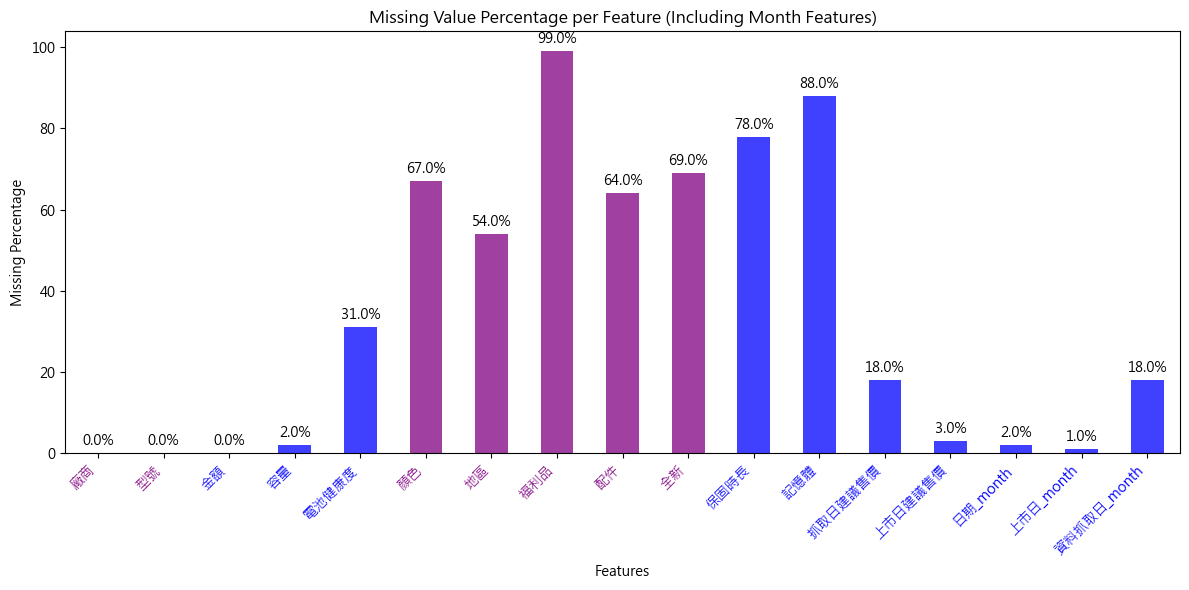

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
# 設置 Matplotlib 內建的支持繁體字的字型

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用 Microsoft JhengHei
plt.rcParams['axes.unicode_minus'] = False  # 防止顯示負號時出現錯誤



# 讀取 JSON 檔案
with open('final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 將 JSON 轉換為 DataFrame
df = pd.DataFrame(data)

# 將日期型資料轉換為日期格式
df['日期'] = pd.to_datetime(df['日期'], errors='coerce')
df['上市日'] = pd.to_datetime(df['上市日'], errors='coerce')
df['資料抓取日'] = pd.to_datetime(df['資料抓取日'], errors='coerce')

# 提取「上市日」和「資料抓取日」的月份
df['日期_month'] = df['日期'].dt.month
df['上市日_month'] = df['上市日'].dt.month
df['資料抓取日_month'] = df['資料抓取日'].dt.month

df = df.drop(['日期', '上市日', '資料抓取日'], axis=1)

# 計算每個特徵的缺失數量
missing_values = df.isnull().sum()
miss = round(missing_values / len(data), 2) * 100

# 把百分比符號加到每個數值後
miss_percentage = miss.astype(str) + '%'

# 顯示缺失比例
print('各特徵的缺失比例：')
print(miss_percentage)

# 定義需要標記不同顏色的特徵
highlighted_features = [
    '金額', '抓取日建議售價', '記憶體', '上市日建議售價', '容量', '保固時長', '電池健康度','日期_month','上市日_month', '資料抓取日_month'
]  

# 設定顏色：所有特徵默認顏色為 'skyblue'，但特定的特徵顏色設置為紅色
colors = ['Blue' if feature in highlighted_features else 'purple' for feature in miss.index]


# 繪製長條圖
plt.figure(figsize=(12, 6))
ax = miss.plot(kind='bar', color=colors, alpha=0.75)

# 添加標題與標籤
plt.title('Missing Value Percentage per Feature (Including Month Features)')
plt.xlabel('Features' )
plt.ylabel('Missing Percentage')

# 顯示每個長條上的缺失比例
for i, v in enumerate(miss):
    plt.text(i, v + 1, f'{v}%', ha='center', va='bottom', fontsize=10)

# 更改 X 軸標籤顏色
for label in ax.get_xticklabels():
    feature_name = label.get_text()
    if feature_name in highlighted_features:
        label.set_color('Blue')
    else:
        label.set_color('purple')

# 顯示圖表
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





金額與所有特徵的相關性（排除金額）：
抓取日建議售價        0.803793
上市日建議售價        0.787593
容量             0.643519
保固時長           0.250056
電池健康度          0.177555
記憶體            0.156101
日期_month       0.076522
上市日_month      0.070083
資料抓取日_month         NaN
Name: 金額, dtype: float64


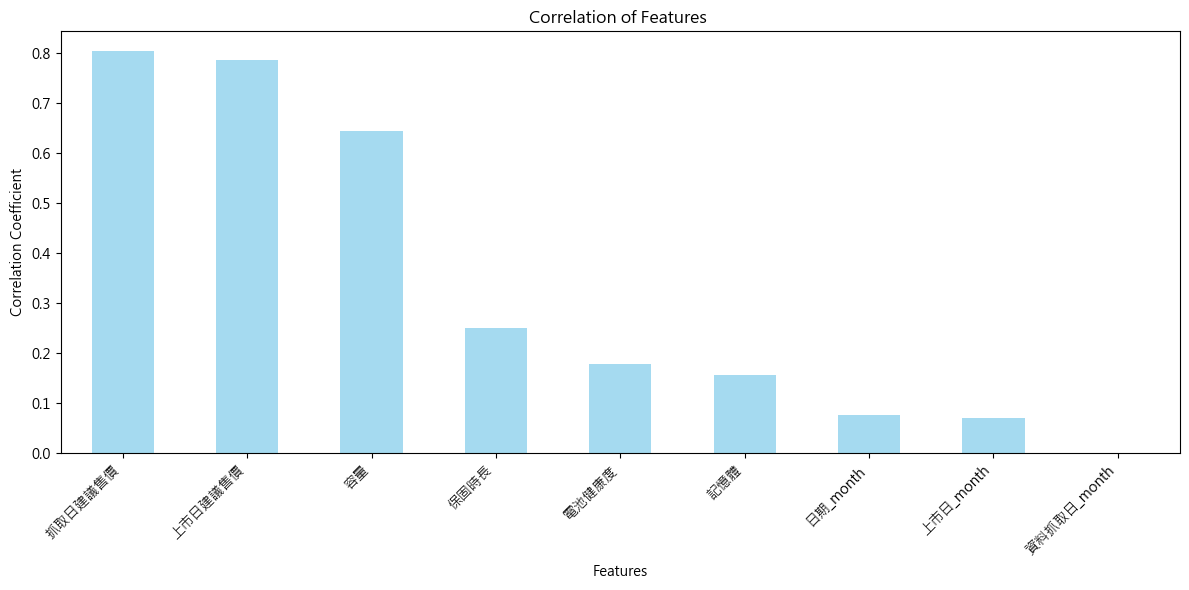

In [28]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# 讀取 JSON 檔案
with open('final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 將 JSON 轉換為 DataFrame
df = pd.DataFrame(data)

# -------------------------
# 步驟 1: 顯示數值型特徵對金額的重要性
# 只保留數值型資料
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 填補數值型特徵中的缺失值
df_numeric = df_numeric.fillna(df_numeric.mean())

# -------------------------
# 步驟 2: 將日期型資料轉換為日期格式並提取月份
df['日期'] = pd.to_datetime(df['日期'], errors='coerce')
df['上市日'] = pd.to_datetime(df['上市日'], errors='coerce')
df['資料抓取日'] = pd.to_datetime(df['資料抓取日'], errors='coerce')

# 提取「上市日」和「資料抓取日」的月份
df['日期_month'] = df['日期'].dt.month
df['上市日_month'] = df['上市日'].dt.month
df['資料抓取日_month'] = df['資料抓取日'].dt.month

# -------------------------
# 步驟 3: 計算日期型與數值型特徵對金額的相關性
df_all = pd.concat([df_numeric, df[['日期_month', '上市日_month', '資料抓取日_month']]], axis=1)

# 計算所有數值型特徵的相關性
correlation_all = df_all.corr()

# 提取金額與其他特徵的相關性，並排除金額
correlation_with_price_all = correlation_all['金額'].drop('金額').sort_values(ascending=False)

# 顯示金額與其他特徵的相關性（包括月份特徵）
print("\n金額與所有特徵的相關性（排除金額）：")
print(correlation_with_price_all)

# -------------------------
# 步驟 4: 顯示金額與日期型和數值型特徵的相關性長條圖
plt.figure(figsize=(12, 6))
correlation_with_price_all.plot(kind='bar', color='skyblue', alpha=0.75)

# 添加標題與標籤
plt.title('Correlation of Features ')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')

# 顯示圖表
plt.tight_layout()
plt.show()




金額與所有特徵的相關性（排除金額）：
抓取日建議售價        0.803793
上市日建議售價        0.787593
容量             0.643519
保固時長           0.250056
資料抓取日_month    0.197261
電池健康度          0.177555
記憶體            0.156101
配件_encoded     0.102782
全新_encoded     0.090308
地區             0.077979
日期_month       0.076522
上市日_month      0.070083
福利品_encoded    0.034686
型號_encoded    -0.041307
顏色            -0.052933
廠商_encoded    -0.288697
Name: 金額, dtype: float64


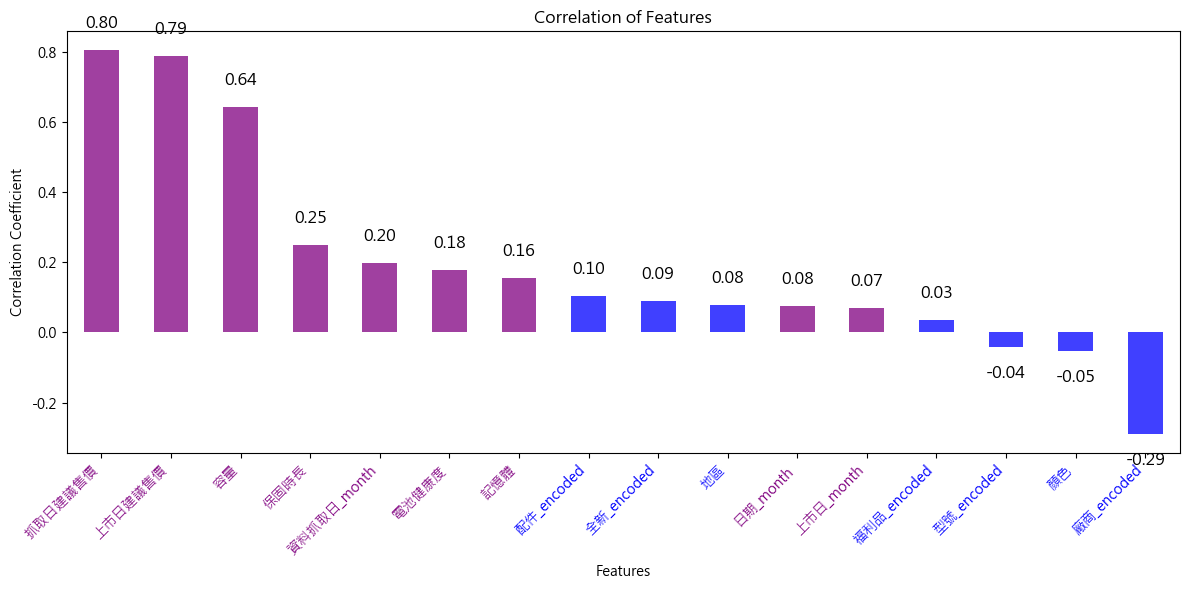

In [90]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder

# 讀取 JSON 檔案
with open('final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 將 JSON 轉換為 DataFrame
df = pd.DataFrame(data)

# -------------------------
# 步驟 1: 顯示數值型特徵對金額的重要性
# 只保留數值型資料
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# 填補數值型特徵中的缺失值
df_numeric = df_numeric.fillna(df_numeric.mean())

# -------------------------


# 步驟 2: 將日期型資料轉換為日期格式並提取月份
df['日期'] = pd.to_datetime(df['日期'], errors='coerce')
df['上市日'] = pd.to_datetime(df['上市日'], errors='coerce')
df['資料抓取日'] = pd.to_datetime(df['資料抓取日'], errors='coerce')

# 找出轉換成功的日期
valid_dates = df['資料抓取日'].dropna()

if not valid_dates.empty:
    median_date = valid_dates.median()
    # 找出缺失值的位置
    missing_idx = df['資料抓取日'].isna()
    # 為每個缺失值生成一個隨機天數（這裡範圍設為 -7 到 7 天）
    random_days = pd.to_timedelta(np.random.randint(-7, 8, size=missing_idx.sum()), unit='D')
    # 將隨機日期填入缺失位置
    df.loc[missing_idx, '資料抓取日'] = median_date + random_days
else:
    # 如果沒有有效日期，可考慮給定一個預設值
    df['資料抓取日'] = pd.Timestamp('today')



# 提取「上市日」和「資料抓取日」的月份
df['日期_month'] = df['日期'].dt.month
df['上市日_month'] = df['上市日'].dt.month
df['資料抓取日_month'] = df['資料抓取日'].dt.month



# -------------------------
# 步驟 3: 將缺失值視為一種特殊類別
df['福利品'] = df['福利品'].fillna('unknown')
df['全新'] = df['全新'].fillna('unknown')
df['配件'] = df['配件'].fillna('unknown')
df['保固時長'] = df['保固時長'].fillna('unknown')

# 確保所有類別型特徵都是字符串類型
df['廠商'] = df['廠商'].astype(str)
df['型號'] = df['型號'].astype(str)
df['福利品'] = df['福利品'].astype(str)
df['全新'] = df['全新'].astype(str)
df['配件'] = df['配件'].astype(str)
df['保固時長'] = df['保固時長'].astype(str)

# -------------------------
# 步驟 4: 顏色、地區、記憶體使用頻率編碼
def frequency_encoding(df, column):
    freq = df[column].value_counts() / len(df)
    df[column] = df[column].map(freq)
    return df

# 對「顏色」、「地區」、「記憶體」進行頻率編碼
df = frequency_encoding(df, '顏色')
df = frequency_encoding(df, '地區')
df = frequency_encoding(df, '記憶體')

# -------------------------
# 步驟 5: 對於「福利品」、「全新」、「配件」、「保固時長」進行標籤編碼
le = LabelEncoder()

# 對這些類別型特徵進行標籤編碼
df['福利品_encoded'] = le.fit_transform(df['福利品'])
df['全新_encoded'] = le.fit_transform(df['全新'])
df['配件_encoded'] = le.fit_transform(df['配件'])
df['保固時長_encoded'] = le.fit_transform(df['保固時長'])
df['廠商_encoded'] = le.fit_transform(df['廠商'])
df['型號_encoded'] = le.fit_transform(df['型號'])

# -------------------------
# 步驟 6: 將標籤編碼後的特徵與數值型特徵以及月份特徵進行合併
df_all = pd.concat([df_numeric, df[['日期_month', '上市日_month', '資料抓取日_month', '顏色', '地區', 
                                    '福利品_encoded', '全新_encoded', '配件_encoded', '廠商_encoded','型號_encoded']]], axis=1)#'保固時長_encoded',, '記憶體'

# -------------------------
# 步驟 7: 計算所有數值型特徵的相關性
correlation_all = df_all.corr()

# 提取金額與其他特徵的相關性，並排除金額
correlation_with_price_all = correlation_all['金額'].drop('金額').sort_values(ascending=False)

# 顯示金額與所有特徵的相關性（包括月份特徵）
print("\n金額與所有特徵的相關性（排除金額）：")
print(correlation_with_price_all)

# -------------------------
# 定義需要標記不同顏色的特徵
highlighted_features = [
    '顏色', '地區', '福利品_encoded', '全新_encoded', '配件_encoded','廠商_encoded','型號_encoded'
]  

# 設定顏色：所有特徵默認顏色為 'skyblue'，但特定的特徵顏色設置為紅色
colors = ['Blue' if feature in highlighted_features else 'purple' for feature in correlation_with_price_all.index]


# 步驟 8: 繪製金額與所有特徵的相關性長條圖
plt.figure(figsize=(12, 6))
ax = correlation_with_price_all.plot(kind='bar', color=colors, alpha=0.75)






# 顯示每個長條上的缺失比例
for i, v in enumerate(correlation_with_price_all):
    # 根據正負決定偏移量和垂直對齊方式
    if v >= 0:
        offset = 0.1  # 正值時往上偏移
        va = 'top'
    else:
        offset = -0.1  # 負值時往下偏移
        va = 'bottom'
    plt.text(i, v + offset, f'{v:.2f}', ha='center', va=va, fontsize=12)


# 更改 X 軸標籤顏色
for label in ax.get_xticklabels():
    feature_name = label.get_text()
    if feature_name in highlighted_features:
        label.set_color('Blue')
    else:
        label.set_color('purple')


# 添加標題與標籤
plt.title('Correlation of Features')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')

# 顯示圖表
plt.tight_layout()
plt.show()




In [56]:
print("Data before dropping NaN:", df_all.shape)
df_all = df_all.dropna()
print("Data after dropping NaN:", df_all.shape)

Data before dropping NaN: (0, 29)
Data after dropping NaN: (0, 29)


In [57]:
print(df.isna().sum())  # 檢查每列的缺失值數量
print(df.shape)  # 檢查原始數據的形狀

廠商              273546
型號              272324
金額                   0
容量                5726
電池健康度            85568
顏色              273546
日期              273546
地區              273546
福利品                  0
配件                   0
全新                   0
保固時長                 0
記憶體             240254
上市日             273546
資料抓取日                0
抓取日建議售價          48423
上市日建議售價           8921
日期_month        273546
上市日_month       273546
資料抓取日_month          0
福利品_encoded          0
全新_encoded           0
配件_encoded           0
保固時長_encoded         0
廠商_encoded           0
型號_encoded           0
dtype: int64
(273546, 26)


In [80]:
import pandas as pd
import json
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

# 讀取 JSON 檔案
with open('final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 轉換為 DataFrame
df = pd.DataFrame(data)

# 重新選擇數值型特徵
df_numeric = df.select_dtypes(include=['number'])

# 處理數值型特徵的缺失值，填補均值
df_numeric = df_numeric.fillna(0)  #df_numeric.mean()

# -------------------------
# 步驟 2: 日期處理
df['日期'] = pd.to_datetime(df['日期'], errors='coerce')
df['上市日'] = pd.to_datetime(df['上市日'], errors='coerce')
df['資料抓取日'] = pd.to_datetime(df['資料抓取日'], errors='coerce')

# 處理資料抓取日缺失值
valid_dates = df['資料抓取日'].dropna()
if not valid_dates.empty:
    median_date = valid_dates.median()
    missing_idx = df['資料抓取日'].isna()
    random_days = pd.to_timedelta(np.random.randint(-7, 8, size=missing_idx.sum()), unit='D')
    df.loc[missing_idx, '資料抓取日'] = median_date + random_days
else:
    df['資料抓取日'] = pd.Timestamp('today')

# 轉換為月份
df['日期_month'] = df['日期'].dt.month
df['上市日_month'] = df['上市日'].dt.month
df['資料抓取日_month'] = df['資料抓取日'].dt.month

# -------------------------
# 步驟 3: 缺失值視為新類別
for col in ['福利品', '全新', '配件']:
    df[col] = df[col].fillna(0).astype(str)

# -------------------------
# 步驟 4: 頻率編碼（顏色、地區、記憶體）
def frequency_encoding(df, column):
    freq = df[column].value_counts() / len(df)
    df[column] = df[column].map(freq)
    return df

#df_numeric = df_numeric.drop(columns=['記憶體'])

df = frequency_encoding(df, '顏色')
df = frequency_encoding(df, '地區')
#df = frequency_encoding(df, '記憶體')

# -------------------------
# 步驟 5: 標籤編碼（福利品、全新、配件、保固時長、廠商、型號）
le = LabelEncoder()
for col in ['福利品', '全新', '配件', '廠商', '型號']:
    df[col + '_encoded'] = le.fit_transform(df[col].fillna(0))

# -------------------------
# 步驟 6: 合併所有特徵
df_all = pd.concat([
    df_numeric,
    df[['日期_month', '上市日_month', '資料抓取日_month', '顏色', '地區',  
        '福利品_encoded', '全新_encoded', '配件_encoded', '廠商_encoded', '型號_encoded']]
], axis=1)

# 移除 NaN
df_all = df_all.dropna()

# -------------------------
# 步驟 7: 標準化數據
scaler = StandardScaler()
X = df_all.drop(columns=['金額'])  # 獨立變數
y = df_all['金額']  # 目標變數

X_scaled = scaler.fit_transform(X)  # 標準化數據

# -------------------------
# 步驟 8: 線性回歸建模
X_with_const = sm.add_constant(X_scaled)  # 加入常數項
model = sm.OLS(y, X_with_const).fit()  # 使用 OLS 進行回歸
coefficients = model.params[1:]  # 取出回歸係數（不含截距）
p_values = model.pvalues[1:]  # 取出 P 值（不含截距）

# -------------------------
# 步驟 9: 排序變數影響力
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients, 'P-Value': p_values})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# 只顯示 p-value < 0.05（統計顯著的特徵）
significant_features = coef_df[coef_df['P-Value'] < 0.05]

# 結果輸出
print("\n*** 線性回歸特徵影響排序 ***")
print(tabulate(coef_df, headers='keys', tablefmt='pretty', showindex=False))

print("\n*** 統計顯著的特徵（p-value < 0.05）***")
print(tabulate(significant_features, headers='keys', tablefmt='pretty', showindex=False))



*** 線性回歸特徵影響排序 ***
+------------------+---------------------+------------------------+--------------------+
|     Feature      |     Coefficient     |        P-Value         |  Abs_Coefficient   |
+------------------+---------------------+------------------------+--------------------+
|  抓取日建議售價  |  6796.876572500993  |          0.0           | 6796.876572500993  |
|  上市日建議售價  | 3299.9786290901575  |          0.0           | 3299.9786290901575 |
|    電池健康度    | -2800.4401404763007 |          0.0           | 2800.4401404763007 |
|     保固時長     | 2615.7509529762356  |          0.0           | 2615.7509529762356 |
|   廠商_encoded   | -1534.4974111744996 |          0.0           | 1534.4974111744996 |
| 資料抓取日_month | -414.2117203632055  | 2.190835722587246e-70  | 414.2117203632055  |
|       容量       | 365.15134663103134  |  7.59689110171048e-37  | 365.15134663103134 |
|   全新_encoded   |  340.0191928654399  | 1.3558637391378258e-53 | 340.0191928654399  |
|    日期_month    |  316.60486227718

In [81]:
import pandas as pd
from tabulate import tabulate

# 假設你有一個 tabulate 的表格結果（可以是字符串或列表）
# 在這裡，我將直接使用 `coef_df` DataFrame 並進行 `tabulate` 顯示
table_result = tabulate(coef_df, headers='keys', tablefmt='pipe', showindex=False)

# 將 tabulate 表格的結果轉換為 DataFrame（這樣就可以更方便地操作和輸出到 Excel）
# 這樣你可以直接使用 coef_df 來操作數據
# 這裡的 DataFrame 是直接從原始 coef_df 轉換過來的
output_df = coef_df.copy()  # 假設你需要處理的表格數據是 coef_df

# 使用 pandas 的 to_excel 將表格結果寫入 Excel
output_df.to_excel("output_table.xlsx", index=False)

print("表格已成功導出到 'output_table.xlsx'。")


表格已成功導出到 'output_table.xlsx'。


In [73]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [54]:
# 1. 先列出所有欄位的數據型態
print("原始數據型態：")
print(df.dtypes)


# 2. 強制轉換數值型欄位
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 無法轉換的變 NaN

# 3. 再次列出欄位型態，確認轉換是否成功
print("\n轉換後數據型態：")
print(df.dtypes)

原始數據型態：
廠商          object
型號          object
金額           int64
容量         float64
電池健康度      float64
顏色          object
日期          object
地區          object
福利品         object
配件         float64
全新         float64
保固時長       float64
記憶體        float64
上市日         object
資料抓取日       object
抓取日建議售價    float64
上市日建議售價    float64
dtype: object

轉換後數據型態：
廠商         float64
型號         float64
金額           int64
容量         float64
電池健康度      float64
顏色         float64
日期         float64
地區         float64
福利品        float64
配件         float64
全新         float64
保固時長       float64
記憶體        float64
上市日        float64
資料抓取日      float64
抓取日建議售價    float64
上市日建議售價    float64
dtype: object


In [65]:
import pandas as pd
import json
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# 讀取 JSON 檔案
with open('final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 將 JSON 轉換為 DataFrame
df = pd.DataFrame(data)

# 需要進行 Target Encoding 的非數值型特徵
categorical_features = df.select_dtypes(exclude=['float64', 'int64']).columns

# 計算全體數據的目標變數金額的平均值
global_mean = df['金額'].mean()

# 設置平滑因子
smooth_factor = 10

# 定義平滑的 Target Encoding 函數
def smooth_target_encoding(group, global_mean, smooth_factor):
    count = group.count()
    mean = group.mean()
    return (mean * count + global_mean * smooth_factor) / (count + smooth_factor)

# 進行 Target Encoding（平滑技術）
for feature in categorical_features:
    # 檢查是否有缺失的值再進行編碼
    if feature in df.columns:
        df[feature + '_encoded'] = df.groupby(feature)['金額'].transform(smooth_target_encoding, global_mean=global_mean, smooth_factor=smooth_factor)

# 檢查是否存在編碼過的特徵
encoded_features = [f"{feature}_encoded" for feature in categorical_features if f"{feature}_encoded" in df.columns]

# 確保填充缺失值（NaN）為數值型特徵的眾數
for feature in df.columns:
    mode_value = df[feature].mode()[0]  # 取得該特徵的眾數
    df[feature] = df[feature].fillna(mode_value)  # 填充為眾數

# 需要進行回歸分析的特徵：數值型特徵 + 目標編碼後的特徵
features = df.select_dtypes(include=['float64', 'int64']).columns.tolist() + encoded_features

# 分割數據集
X = df[features]
y = df['金額']

# 使用 Lasso 進行交叉驗證
lasso_model = Lasso(alpha=0.1)
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')

# 顯示交叉驗證結果
print(f"交叉驗證 R² 分數：{scores.mean():.4f}")


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_6196\4196897352.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[feature] = df[feature].fillna(mode_value)  # 填充為眾數


交叉驗證 R² 分數：1.0000


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# 使用 Lasso 進行交叉驗證
lasso_model = Lasso(alpha=0.1)
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='r2')

# 顯示交叉驗證結果
print(f"交叉驗證 R² 分數：{scores.mean():.4f}")

交叉驗證 R² 分數：1.0000


In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# 讀取資料
file_path = 'final.json'
data = pd.read_json(file_path)

# 清理欄位名稱：去除前後空白
data.columns = data.columns.str.strip()

# 定義清洗函式
def clean_capacity(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return float(match.group()) if match else np.nan
    try:
        return float(value)
    except:
        return np.nan

def clean_numeric(value):
    try:
        return float(value)
    except:
        return np.nan

def clean_to_string(value):
    if isinstance(value, dict):
        return str(value)
    elif isinstance(value, list):
        return ','.join([clean_to_string(v) for v in value])
    try:
        return str(value)
    except:
        return 'Unknown'

# 將日期轉為數值（以秒數表示）
def clean_date(value):
    try:
        dt = pd.to_datetime(value, errors='coerce')
        if pd.isna(dt):
            return np.nan
        return dt.timestamp()
    except:
        return np.nan

# 清洗數值欄位（原始欄位：金額、容量、電池健康度）
for col in ['金額', '容量', '電池健康度']:
    if col in data.columns:
        data[col] = data[col].apply(clean_numeric)

# 處理日期型欄位：日期、上市日、資料抓取日
for col in ['日期', '上市日', '資料抓取日']:
    if col in data.columns:
        data[col] = data[col].apply(clean_date)

# 處理顏色欄位
if '顏色' in data.columns:
    if data['顏色'].isna().sum() / len(data) > 0.5:
        data['顏色'] = data['顏色'].fillna('Unknown')
    else:
        data['顏色'] = data['顏色'].apply(clean_to_string)

# 處理類別型欄位
categorical_cols = ['廠商', '型號', '顏色', '地區', '福利品', '配件', '全新']
label_encoders = {}

for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].astype(str)  # 將 object 轉為 string
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])
        label_encoders[col] = encoder

# 移除金額為 NaN 的資料
data = data[data['金額'].notna()]

# 完整特徵列表（包含所有可能出現的特徵）
full_feature_list = ['廠商', '型號', '容量', '電池健康度', '顏色', '日期', '地區', '福利品', 
                     '配件', '全新', '保固時長', '記憶體', '上市日', '資料抓取日', 
                     '抓取日建議售價', '上市日建議售價']

# 建立完整的 DataFrame，缺少的特徵填入 NaN
X_all = data.reindex(columns=full_feature_list).fillna(0)






X_all = add_constant(X)  # 在X矩陣中加入常數項
vif = pd.DataFrame()
vif["Feature"] = X_all.columns
vif["VIF"] = [variance_inflation_factor(X_all.values, i) for i in range(X_all.shape[1])]
print(vif)


NameError: name 'X' is not defined

VIF（Variance Inflation Factor，方差膨脹因子）用來衡量特徵之間的多重共線性，即特徵之間的相關性。具體來說，VIF 指出某一特徵是如何被其他特徵所解釋的。

解釋：
VIF 值越大：說明該特徵與其他特徵之間的相關性越強，換句話說，該特徵可能會對模型帶來過多的重複信息，進而導致過擬合。
VIF 值越小：表示該特徵與其他特徵之間的相關性越低，這樣該特徵有更多的獨立性，對模型的貢獻更為直接。
通常，VIF 值較大的特徵可能會引起模型不穩定，因為它們提供了相似的資訊。一般來說，如果 VIF 大於 10，則這個特徵有可能會對模型造成問題。

具體解釋你的結果：
金額：VIF = 8.07

這表明 "金額" 與其他特徵之間有一定的相關性，但其 VIF 值還在合理範圍內（小於 10），不算非常高。金額可能是目標變數，因此其相關性並不意味著問題。
容量：VIF = 2.25

"容量" 的 VIF 值較低，說明它與其他特徵之間的相關性比較弱，這是比較理想的情況。
電池健康度：VIF = 1.39

這個 VIF 值也較低，表示 "電池健康度" 與其他特徵的相關性不高，屬於比較獨立的特徵。
保固時長、記憶體等：VIF 值介於 1 到 2 之間

這些特徵與其他特徵的相關性較低，屬於較為獨立的特徵，這對於模型的穩定性是有幫助的。
上市日建議售價、抓取日建議售價等：VIF 值介於 4 到 8 之間

這些特徵與其他特徵有中等程度的相關性，雖然它們的 VIF 值不是非常高，但還是要注意這些特徵是否會對模型的預測能力產生冗餘影響。
廠商_encoded、型號_encoded：VIF 值分別是 2.53 和 11.12

型號_encoded 的 VIF 值高達 11.12，這意味著 "型號" 編碼後與其他特徵之間存在較強的相關性，可能會引起多重共線性問題，影響模型的穩定性。你可能需要考慮對其進行處理，例如降維、或與其他特徵合併。
其他編碼特徵（顏色_encoded、地區_encoded 等）：VIF 值大多低於 2，這些特徵與其他特徵之間的相關性較弱。

如何解釋和應對：
VIF 大於 10 的特徵（如 "型號_encoded"）需要特別注意。如果某個特徵的 VIF 值過高，這表示該特徵可能與其他特徵高度相關，從而造成多重共線性。解決這個問題的方式包括：

移除相關性較高的特徵（如果它們冗餘）。
使用正則化方法（如 Lasso 或 Ridge 回歸），這可以幫助減少過多的共線性。
進行降維操作（如主成分分析 PCA）來減少特徵之間的相關性。
VIF 小於 5 或接近 1 的特徵（如 "容量"、"電池健康度"）是比較理想的，這些特徵相對獨立，不會引起過擬合問題。

VIF 值介於 5 和 10 之間（如 "抓取日建議售價"、"上市日建議售價"）的特徵可以保留，但可以考慮進一步評估它們與目標變數的相關性，避免冗餘信息。

總結：
對於型號_encoded（VIF = 11.12），你可能需要進行處理，因為它的 VIF 值過高，會導致多重共線性問題。你可以考慮移除這個特徵，或是進行降維。
對於 VIF 較小的特徵（例如容量、電池健康度等），可以保留，這些特徵對模型有較少的影響，並且能提高模型的穩定性。
希望這些解釋能幫助你理解如何處理 VIF！如果有更多問題或需要進一步分析，隨時告訴我！

In [67]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 假設 features 是你已選定的所有特徵（包括數值型和經過編碼的非數值型特徵）
# 例如：features = ['金額', '容量', '電池健康度', '保固時長', ..., '資料抓取日_encoded']

# 取出這些特徵的資料
X = df[features]

# 為了計算 VIF，先加入一個常數項（截距）
X_with_const = add_constant(X)

# 計算每個特徵的 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 顯示 VIF 結果（並依需求格式化）
vif_data["VIF"] = vif_data["VIF"].round(2)
print(vif_data)


          Feature           VIF
0           const  3.940950e+03
1              金額  8.070000e+00
2              容量  2.250000e+00
3           電池健康度  1.380000e+00
4            保固時長  1.190000e+00
5             記憶體  1.130000e+00
6         抓取日建議售價  4.970000e+00
7         上市日建議售價  8.390000e+00
8      廠商_encoded  2.712673e+07
9      型號_encoded  6.736455e+09
10     顏色_encoded  3.020700e+06
11     日期_encoded  1.272464e+08
12     地區_encoded  5.682134e+06
13    福利品_encoded  2.510077e+05
14     配件_encoded  3.863559e+05
15     全新_encoded  6.999555e+06
16    上市日_encoded  4.051220e+10
17  資料抓取日_encoded  6.442901e+05
18     廠商_encoded  2.752678e+08
19     型號_encoded  7.922317e+10
20     顏色_encoded  9.213188e+06
21     日期_encoded  6.085773e+06
22     地區_encoded  9.818032e+07
23    福利品_encoded  1.799284e+06
24     配件_encoded  1.666477e+06
25     全新_encoded  1.298292e+06
26    上市日_encoded  1.879068e+09
27  資料抓取日_encoded  2.520061e+05


In [58]:
# 計算 VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 添加常數項（截距項）以計算 VIF
X = df[features]
X_with_const = add_constant(X)

# 計算每個特徵的 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 顯示 VIF 並限制顯示到小數點後兩位，這樣不會使用科學記號
vif_data["VIF"] = vif_data["VIF"].apply(lambda x: f'{x:.2f}')

# 顯示結果
print(vif_data)


          Feature             VIF
0           const         3940.95
1              金額            8.07
2              容量            2.25
3           電池健康度            1.38
4            保固時長            1.19
5             記憶體            1.13
6         抓取日建議售價            4.97
7         上市日建議售價            8.39
8      廠商_encoded     27126727.07
9      型號_encoded   6736454845.92
10     顏色_encoded      3020700.24
11     日期_encoded    127246448.13
12     地區_encoded      5682133.53
13    福利品_encoded       251007.68
14     配件_encoded       386355.91
15     全新_encoded      6999554.73
16    上市日_encoded  40512201313.98
17  資料抓取日_encoded       644290.05
18     廠商_encoded    275267808.07
19     型號_encoded  79223171449.16
20     顏色_encoded      9213187.79
21     日期_encoded      6085773.37
22     地區_encoded     98180319.27
23    福利品_encoded      1799284.21
24     配件_encoded      1666476.78
25     全新_encoded      1298292.43
26    上市日_encoded   1879067512.20
27  資料抓取日_encoded       252006.08


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# 假設你有已經處理過的數據集 X
X = df[features]

# 計算 VIF 值
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# 顯示 VIF 值
print(vif_data)

# 移除 VIF > 100 的特徵
while vif_data['VIF'].max() > 100:
    max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
    print(f"Removing feature: {max_vif_feature}")
    
    # 移除對應的特徵
    X = X.drop(columns=[max_vif_feature])
    
    # 重新計算 VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# 顯示更新後的 VIF
print(vif_data)


          feature           VIF
0              金額  2.136611e+01
1              容量  6.006596e+00
2           電池健康度  3.348380e+02
3            保固時長  1.314988e+00
4             記憶體  5.462845e+01
5         抓取日建議售價  2.030928e+01
6         上市日建議售價  3.915539e+01
7      廠商_encoded  5.073134e+04
8      型號_encoded  1.178297e+06
9      顏色_encoded  7.487159e+06
10     日期_encoded  6.968775e+05
11     地區_encoded  1.876680e+05
12    福利品_encoded  1.659230e+06
13     配件_encoded  2.436581e+06
14     全新_encoded  7.264627e+05
15    上市日_encoded  3.325179e+06
16  資料抓取日_encoded  3.302819e+05
17     廠商_encoded  2.591900e+05
18     型號_encoded  2.486235e+05
19     顏色_encoded  2.343536e+06
20     日期_encoded  5.756452e+04
21     地區_encoded  1.372373e+07
22    福利品_encoded  1.615676e+05
23     配件_encoded  8.539073e+07
24     全新_encoded  1.137896e+06
25    上市日_encoded  2.056969e+06
26  資料抓取日_encoded  1.386058e+05
Removing feature: 配件_encoded
Removing feature: 福利品_encoded
Removing feature: 上市日_encoded
Removing featur

c:\Users\Robby1206\anaconda3\envs\web_scraping\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature: 資料抓取日_encoded


c:\Users\Robby1206\anaconda3\envs\web_scraping\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature: 廠商_encoded


c:\Users\Robby1206\anaconda3\envs\web_scraping\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature: 型號_encoded


c:\Users\Robby1206\anaconda3\envs\web_scraping\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature: 日期_encoded


c:\Users\Robby1206\anaconda3\envs\web_scraping\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature: 地區_encoded


c:\Users\Robby1206\anaconda3\envs\web_scraping\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removing feature: 全新_encoded


KeyboardInterrupt: 

In [63]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 假設 X 是你要用來計算 VIF 的 DataFrame（包含所有特徵）
# 先將無窮大替換為 NaN
X = X.replace([np.inf, -np.inf], np.nan)

# 檢查缺失值
print("各特徵缺失值數量：")
print(X.isnull().sum())

# 選擇填補或刪除缺失值的方法，這裡以填補中位數為例（數值特徵適用）
X = X.fillna(X.median())

# 再次檢查確保已無 NaN 或 inf
print("處理後缺失值數量：")
print(X.isnull().sum())

# 添加常數項
X_const = add_constant(X)

# 計算 VIF
vif_data = pd.DataFrame({
    "Feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

vif_data["VIF"] = vif_data["VIF"].round(2)
print(vif_data)


各特徵缺失值數量：
金額                    0
容量                 5726
電池健康度             85568
保固時長             213936
記憶體              240254
抓取日建議售價           48423
上市日建議售價            8921
廠商_encoded            0
型號_encoded            0
顏色_encoded            0
日期_encoded            0
地區_encoded            0
福利品_encoded           0
配件_encoded            0
全新_encoded            0
上市日_encoded           0
資料抓取日_encoded         0
廠商_encoded            0
型號_encoded            0
顏色_encoded            0
日期_encoded            0
地區_encoded            0
福利品_encoded           0
配件_encoded            0
全新_encoded            0
上市日_encoded           0
資料抓取日_encoded         0
dtype: int64
處理後缺失值數量：
金額               0
容量               0
電池健康度            0
保固時長             0
記憶體              0
抓取日建議售價          0
上市日建議售價          0
廠商_encoded       0
型號_encoded       0
顏色_encoded       0
日期_encoded       0
地區_encoded       0
福利品_encoded      0
配件_encoded       0
全新_encoded       0
上市日_encoded      0
資料抓取日_encoded  